## To Do:
#### - Black code formatting
#### - DocStrings
#### - improved step detection!
#### - retrained network

# Walkthrough:

In [1]:
from Analysis.gaitanalysis import Recording2D
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
rec_list = []
for file in Path.iterdir(Path("/Users/kobel/Downloads/Data Inken/Data/")):
    if file.suffix == '.csv':
        if not 'filtered' in file.name:
            csv_file = str(file)
            rec = Recording2D(filepath=csv_file, recorded_framerate=30)
            if rec.full_df_from_hdf.shape[0] > 150:
                rec.run(intrinsic_camera_calibration_filepath = "/Users/kobel/Downloads/Data Inken/calibration_inken_427img.p")
                rec.run_gait_analysis()
                rec_list.append(rec)

/Users/kobel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kobel/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
output_path = Path("/Users/kobel/Downloads/Data Inken/Analysis/")

In [6]:
groups = pd.read_excel("/Users/kobel/Downloads/Data Inken/Gruppen.xlsx")
for parameter in rec_list[0].parameters_over_steps:
    df = pd.DataFrame(data = {}, columns = ['Data', 'group_id', 'subject_id', 'session_id'])
    for i, rec in enumerate(rec_list):
        data = np.NaN
        group_id = np.NaN
        animal = rec.metadata['animal']
        paradigm = rec.metadata['paradigm']
        try:
            group_id = groups.loc[groups['subject_id'] == animal, 'group_id'].values[0]
        except:
            continue
        try:
            data = rec.parameters_paw_placed[parameter]
        except:
            pass
        if 'ä' in paradigm:
            paradigm = paradigm.replace('ä', 'e')
        if paradigm == 'post6xIgG':
            paradigm = 'post-6xIgG'
        if paradigm == 'post3xIgG':
            paradigm = 'post-3xIgG'
        if paradigm == "post1xIgG":
            paradigm = "post-1xIgG"
        if paradigm == "post-OP3":
            paradigm = "pre-OP3"
        df.loc[i, 'subject_id'] = animal
        df.loc[i, 'session_id'] = paradigm
        df.loc[i, 'group_id'] = group_id
        df.loc[i, 'Data'] = data
    
    df.dropna(inplace = True)
    """
    for paradigm in ['pre-OP1', 'pre-OP2', 'pre-OP3', 'post-OP', 'post-1xIgG', 'post-3xIgG', 'post-6xIgG']:
        for group in np.unique(groups.values[:, 0]):
            if df.loc[(df['group_id'] == group) & (df['session_id'] == paradigm), 'Data'].shape[0] < 3:
                df.loc[(df['group_id'] == group) & (df['session_id'] == paradigm), 'Data'] = np.NaN
    df.dropna(inplace = True)
    """
    df.to_csv(output_path.joinpath(parameter + '_paw_placed.csv'), index=False)

fore_stance_right_ForePawLeft_paw_placed.csv


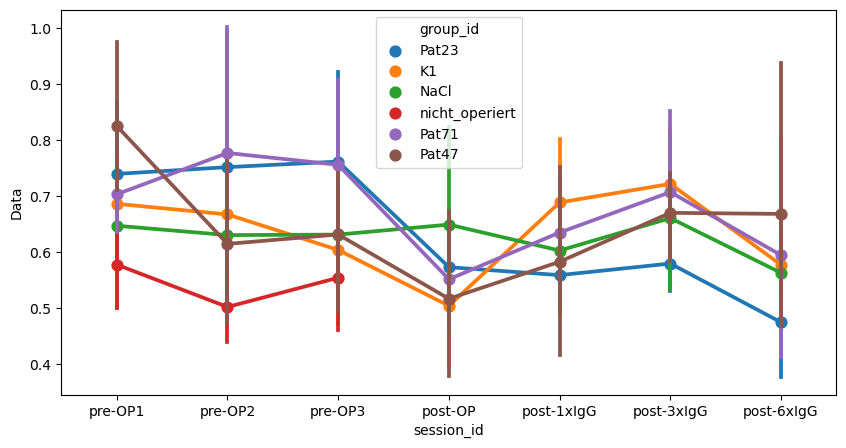

angle_paw_knee_bodyaxis_right_HindPawRight_paw_placed.csv


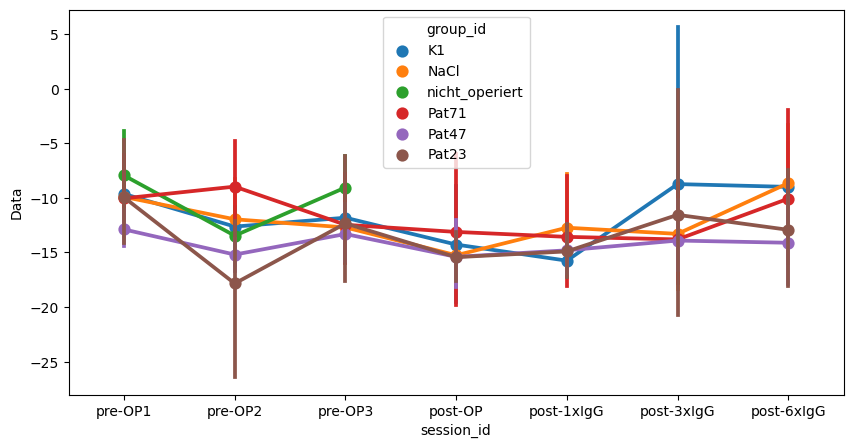

hind_stance_left_HindPawLeft_paw_placed.csv


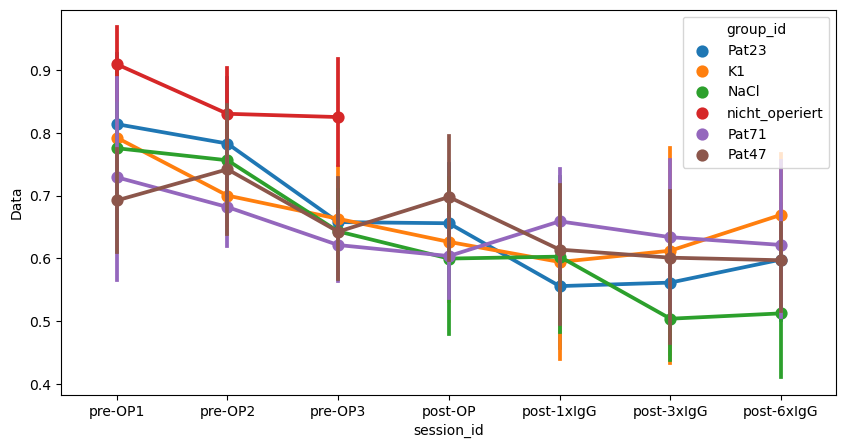

angle_paw_knee_bodyaxis_left_HindPawLeft_paw_placed.csv


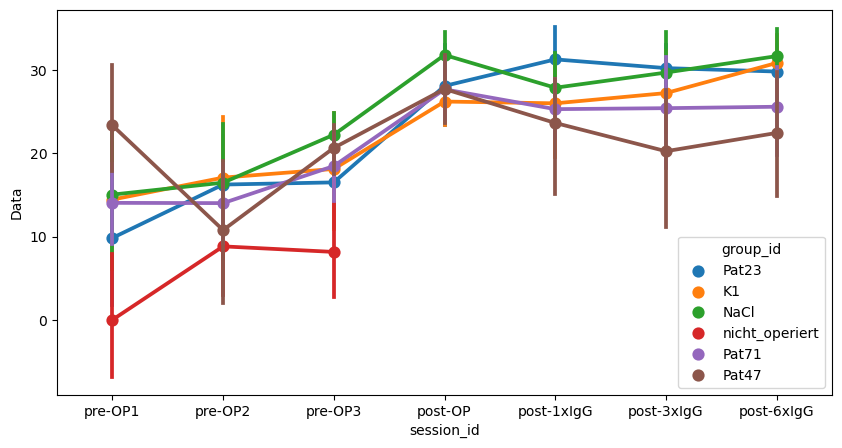

angle_paw_fifthfinger_bodyaxis_fore_left_ForePawRight_paw_placed.csv


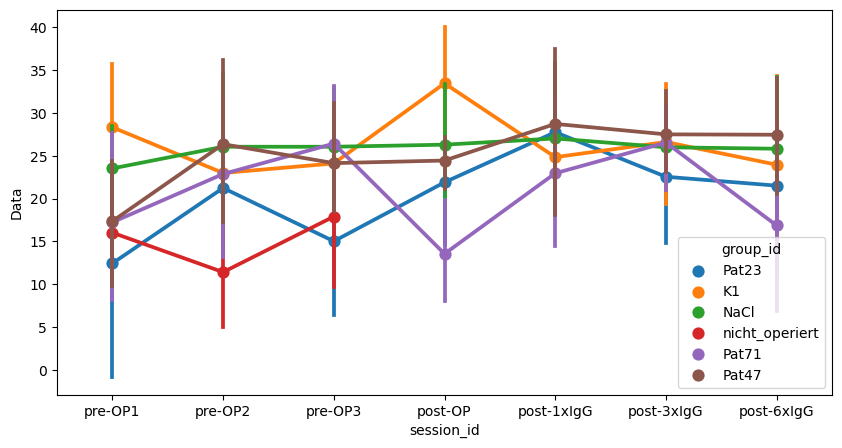

hind_stance_HindPawRight_paw_placed.csv


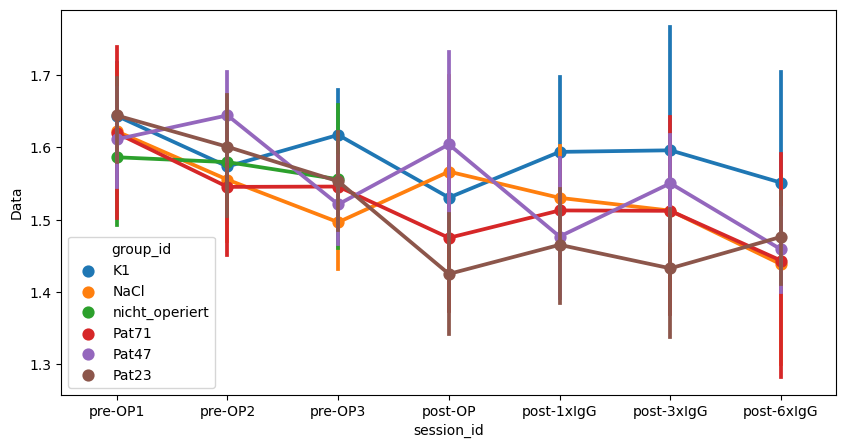

angle_paw_knee_centerofgravity_left_HindPawLeft_paw_placed.csv


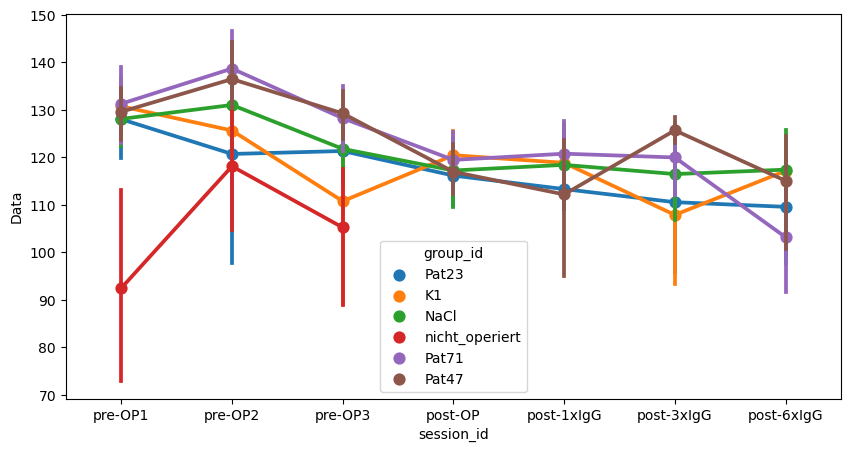

area_hindpawleft_HindPawLeft_paw_placed.csv


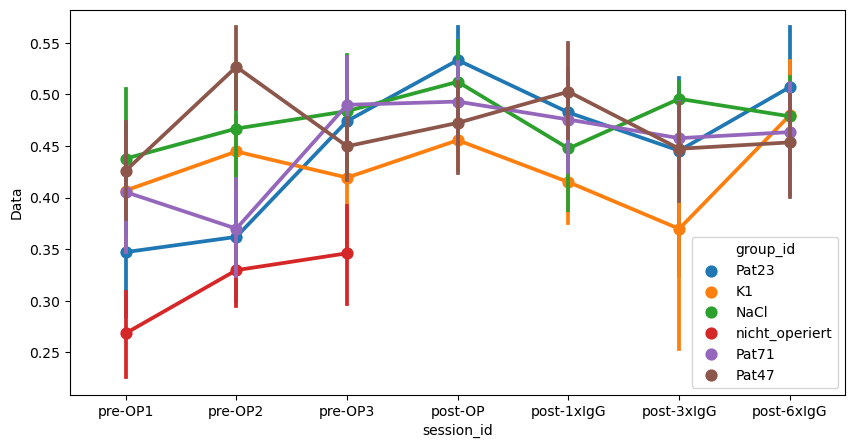

angle_paw_secondfinger_bodyaxis_fore_left_ForePawRight_paw_placed.csv


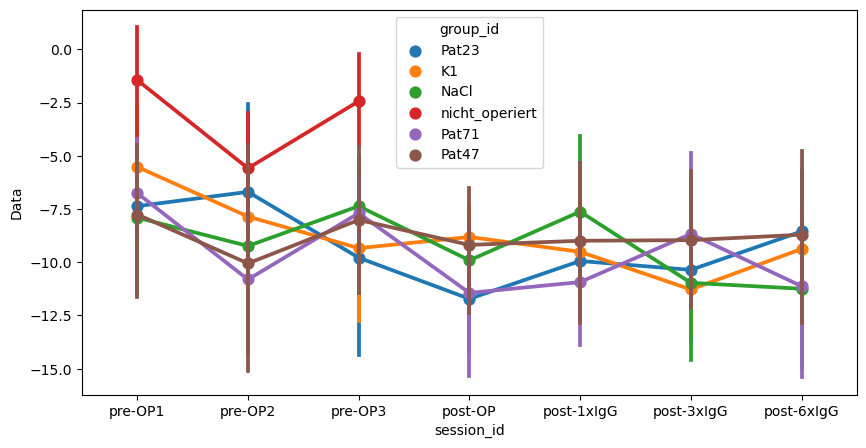

angle_paw_secondfinger_bodyaxis_hind_right_HindPawRight_paw_placed.csv


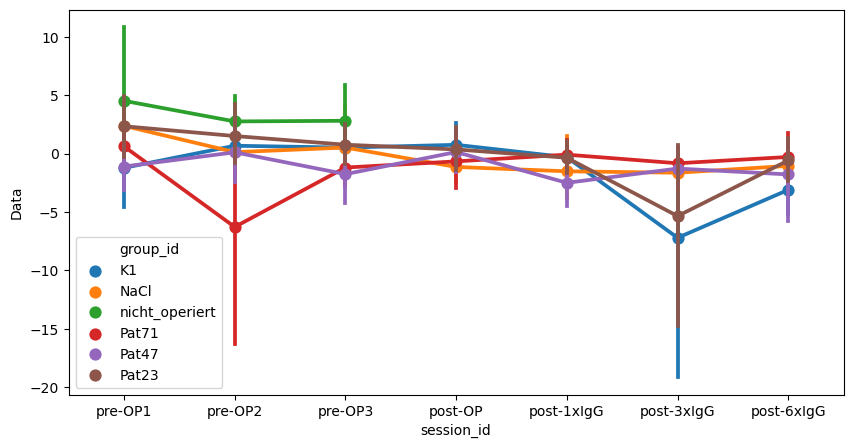

fore_stance_left_ForePawRight_paw_placed.csv


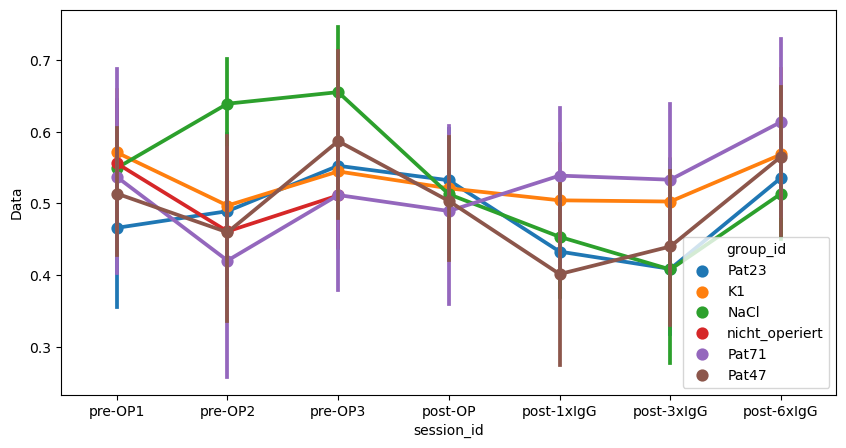

fore_stance_ForePawLeft_paw_placed.csv


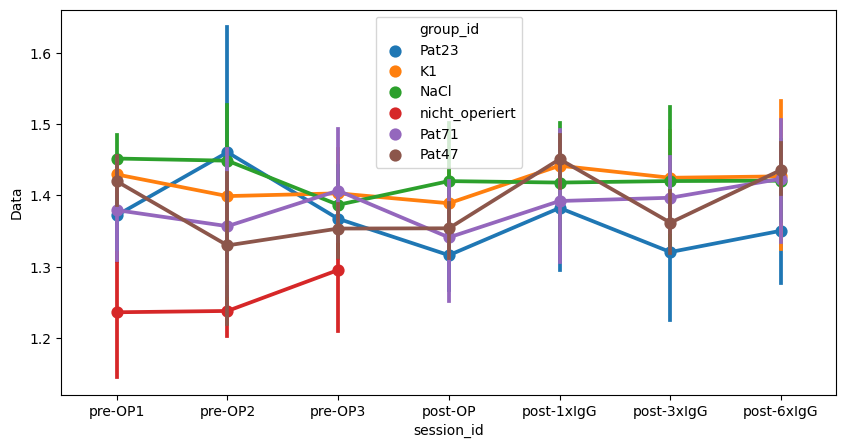

angle_paw_fifthfinger_bodyaxis_fore_right_ForePawLeft_paw_placed.csv


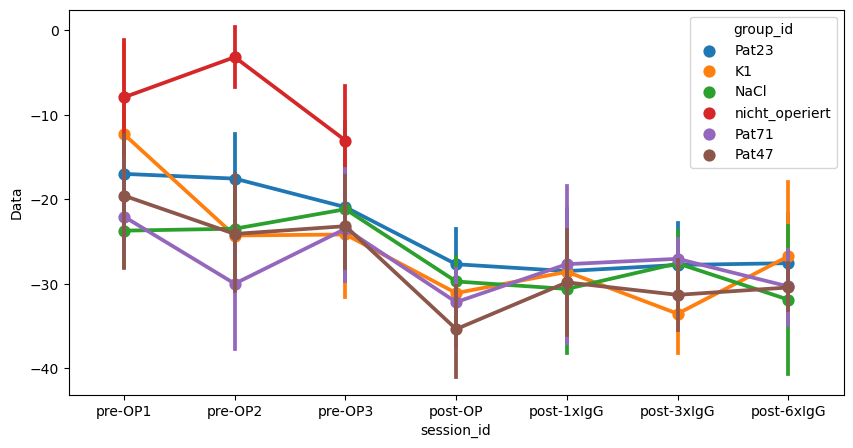

area_hindpawright_HindPawRight_paw_placed.csv


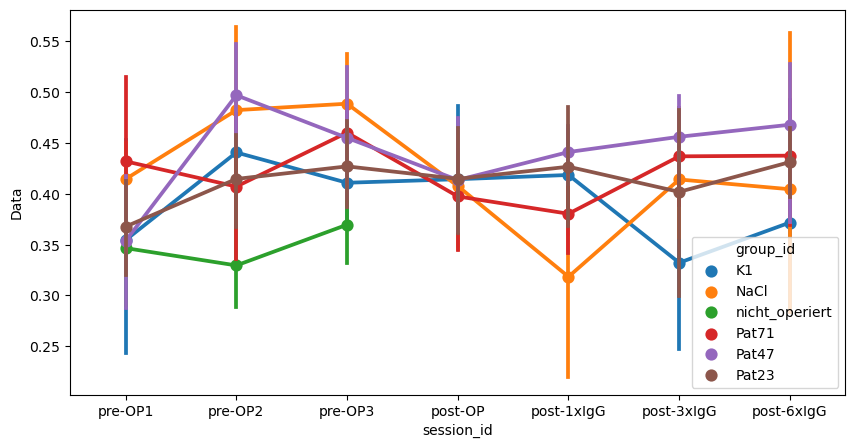

angle_paw_secondfinger_bodyaxis_fore_right_ForePawLeft_paw_placed.csv


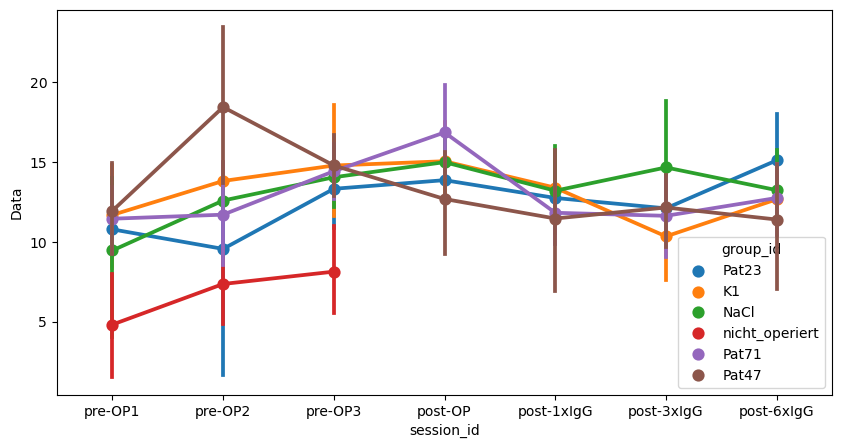

hind_stance_right_HindPawRight_paw_placed.csv


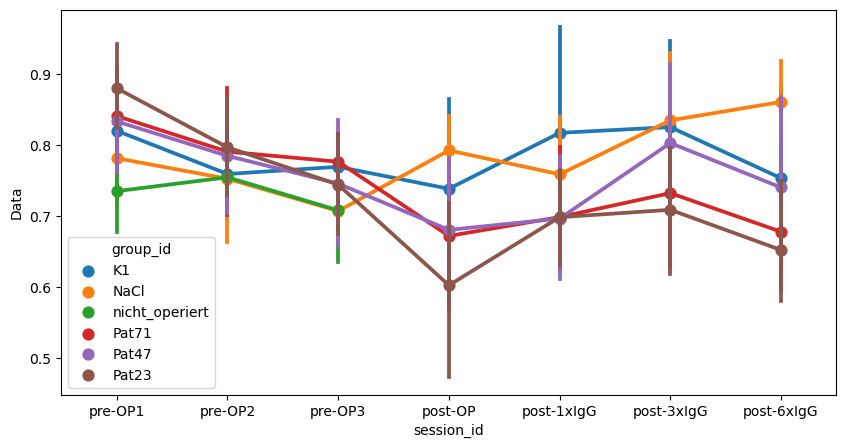

angle_paw_knee_centerofgravity_right_HindPawRight_paw_placed.csv


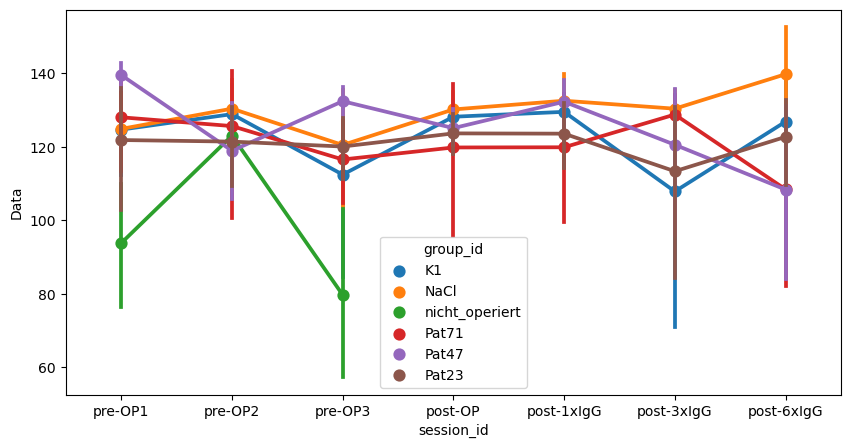

angle_paw_secondfinger_bodyaxis_hind_left_HindPawLeft_paw_placed.csv


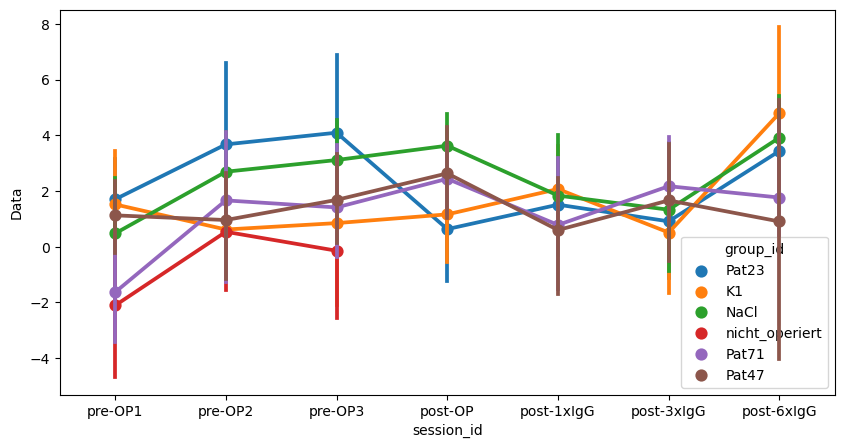

hind_stance_HindPawLeft_paw_placed.csv


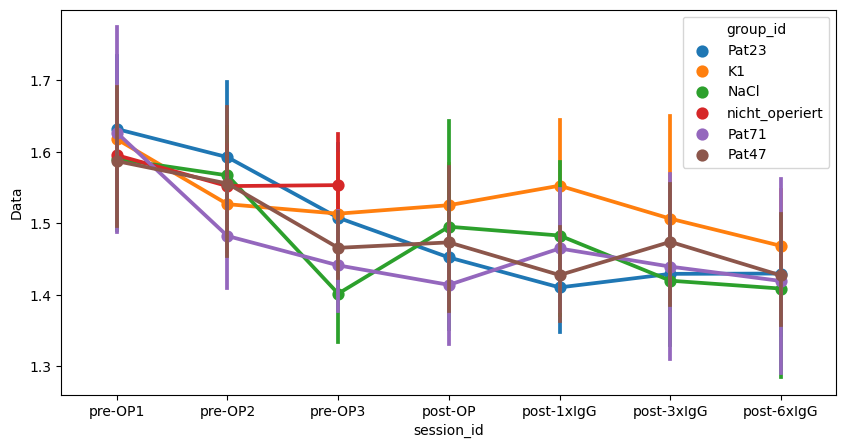

angle_paw_fifthfinger_bodyaxis_hind_left_HindPawLeft_paw_placed.csv


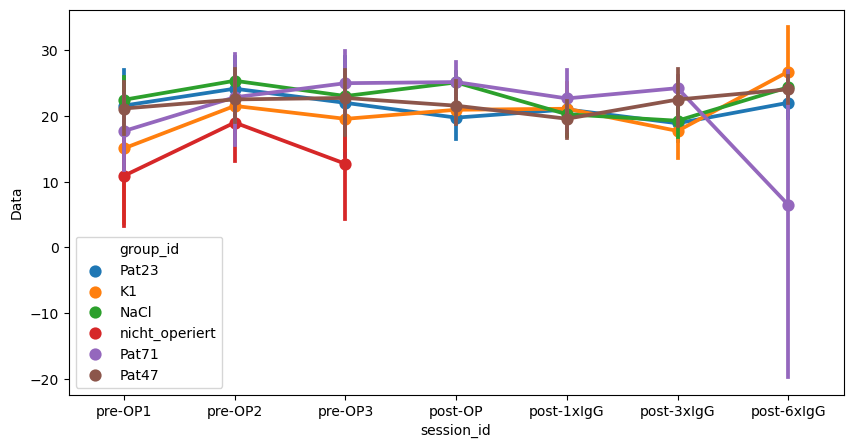

angle_paw_fifthfinger_bodyaxis_hind_right_HindPawRight_paw_placed.csv


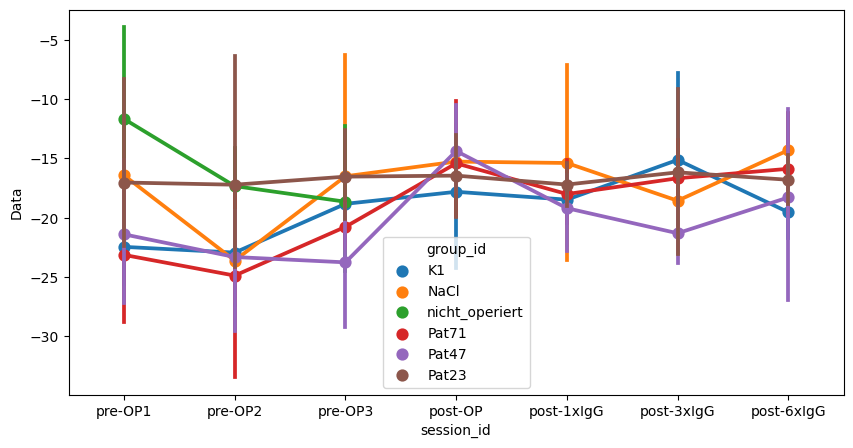

fore_stance_ForePawRight_paw_placed.csv


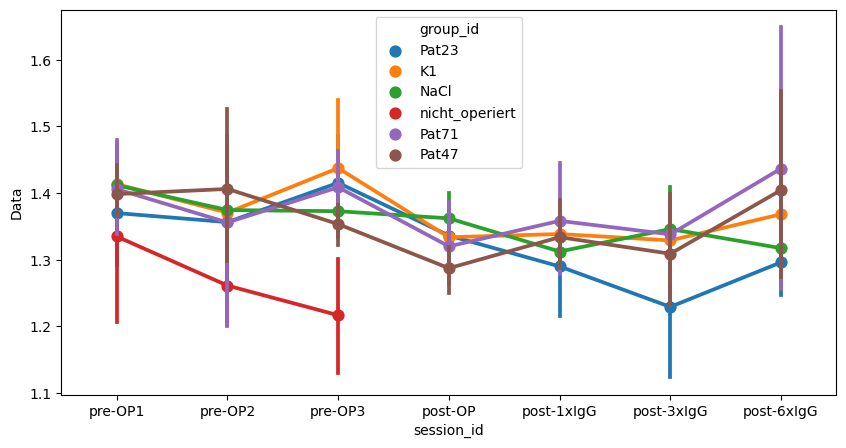

In [7]:
for file in output_path.iterdir():
    if (file.suffix == '.csv') and 'paw_placed' in file.name:
        print(file.name)
        plotting = pd.read_csv(output_path.joinpath(file))
        fig = plt.figure(figsize = (10, 5))
        sns.pointplot(data = plotting, y = 'Data', x = 'session_id', hue = 'group_id', order = ['pre-OP1', 'pre-OP2', 'pre-OP3', 'post-OP', 'post-1xIgG', 'post-3xIgG', 'post-6xIgG'])
        plt.show()

In [8]:

    
groups = pd.read_excel("/Users/kobel/Downloads/Data Inken/Gruppen.xlsx")
for parameter in rec_list[0].parameters_paw_placed:
    df = pd.DataFrame(data = {}, columns = ['Data', 'group_id', 'subject_id', 'session_id'])
    for i, rec in enumerate(rec_list):
        animal = rec.metadata['animal']
        paradigm = rec.metadata['paradigm']
        try:
            group_id = groups.loc[groups['subject_id'] == animal, 'group_id'].values[0]
        except:
            continue
        try:
            data = rec.parameters_paw_placed[parameter]
        except:
            pass
        if 'ä' in paradigm:
            paradigm = paradigm.replace('ä', 'e')
        if paradigm == 'post6xIgG':
            paradigm = 'post-6xIgG'
        if paradigm == 'post3xIgG':
            paradigm = 'post-3xIgG'
        if paradigm == "post1xIgG":
            paradigm = "post-1xIgG"
        if paradigm == "post-OP3":
            paradigm = "pre-OP3"
        df.loc[i, 'subject_id'] = animal
        df.loc[i, 'session_id'] = paradigm
        df.loc[i, 'group_id'] = group_id
        for n in range(-7, 7):
            try:
                df.loc[i, n] = rec.parameters_as_psth[parameter][n]
            except:
                pass
    df.to_csv(output_path.joinpath(parameter + '_psth.csv'), index=False)